In [32]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    %pip install -Uqq fastai

In [2]:
!kaggle datasets download -d rajdalsaniya/pothole-detection-dataset
!kaggle datasets download -d faizalkarim/cleandirty-road-classification

Dataset URL: https://www.kaggle.com/datasets/rajdalsaniya/pothole-detection-dataset
License(s): CC0-1.0
 92%|█████████████████████████████████████▊   | 217M/235M [00:01<00:00, 105MB/s]
100%|█████████████████████████████████████████| 235M/235M [00:01<00:00, 124MB/s]
Dataset URL: https://www.kaggle.com/datasets/faizalkarim/cleandirty-road-classification
License(s): CC0-1.0
 85%|█████████████████████████████████▏     | 61.0M/71.6M [00:00<00:00, 232MB/s]
100%|███████████████████████████████████████| 71.6M/71.6M [00:00<00:00, 216MB/s]


In [3]:
from fastcore.all import *
from fastai.vision.all import *
from zipfile import ZipFile
from pathlib import Path
import os.path

In [4]:
datasets = Path("/kaggle/working/data")
pothole_path = Path(datasets/"potholes")
road_path =  Path(datasets/"roads")

In [5]:
with ZipFile("pothole-detection-dataset.zip", "r") as compressed:
    compressed.extractall(pothole_path)
with ZipFile("cleandirty-road-classification.zip", "r") as compressed:
    compressed.extractall(road_path)

In [6]:
def label_func(f):
    comp = f.parts
    return comp[4]

In [7]:
roads = DataBlock(
blocks = (ImageBlock, CategoryBlock),
get_items = get_image_files,
splitter = RandomSplitter(valid_pct = 0.2, seed= 50),
get_y = label_func,
item_tfms = Resize(460),
batch_tfms = aug_transforms(size = 224, min_scale = 0.75)
)

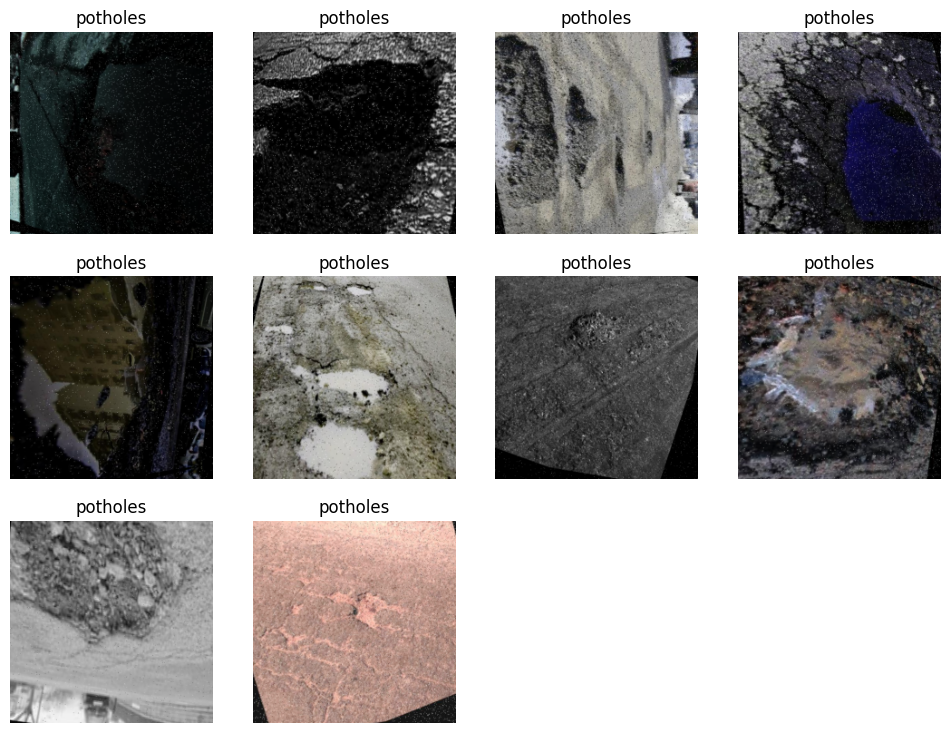

In [8]:
dls = roads.dataloaders(datasets)
dls.show_batch(max_n=10)

In [9]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 94.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.805201,0.245715,0.079741,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.307168,0.104348,0.025862,00:20
1,0.154633,0.019979,0.002155,00:19
2,0.108446,0.029939,0.002155,00:20
3,0.071266,0.025349,0.002155,00:19


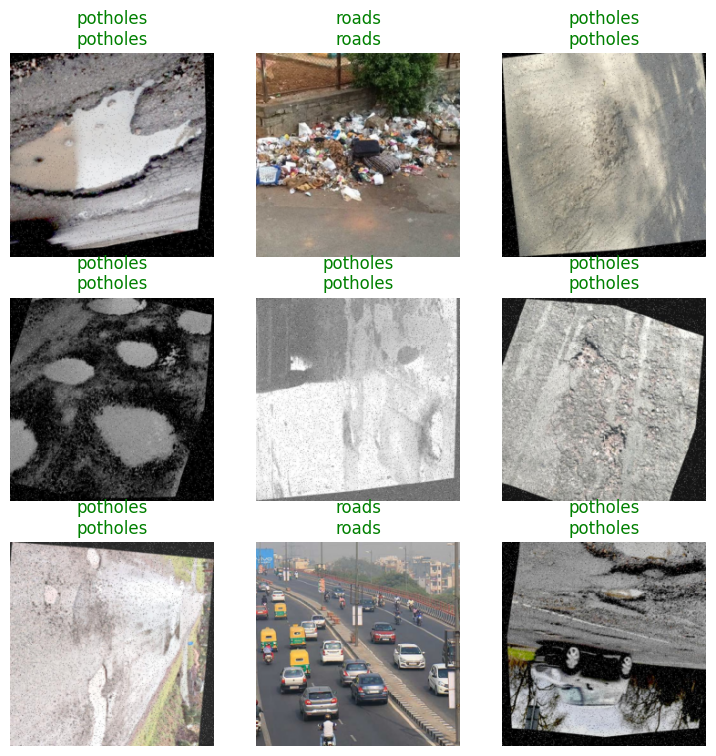

In [10]:
learn.show_results()

# **Testing with external data**

In [33]:
from fastdownload import download_url
from fastai.vision.all import *

In [80]:
urls = ["data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAJQA7QMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAEBQIDAAEGBwj/xAA9EAACAQMCBAMFBgUCBgMAAAABAgMABBESIQUxQVETImEGFDJxkSNCgaGxwQcVUtHwYuEWJDNykqJDU4L/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMABAX/xAAlEQACAgEEAwABBQAAAAAAAAAAAQIRAxITITEEQVFhFCIyUvD/2gAMAwEAAhEDEQA/AL/5NZXAZkcqxPw9qGvuF20AAjTU460ShxsOtZLjBzv8q6akiGpCaezgmCp4WCOZxQcnCIUB8uR0NN540cYDFTQcsqxKEY5I696KZhf7pEnJcHvU0ynlDY+VRkukyRVBuATsaogBYBLE66ujsvHyRzoKGXUdzTO1kKYw1LJ10FGcPt7qwuUklLiI8yO1dnC1pMiMsamTHQUotp/FCxyAaG2O29NbiCxgRPdZCHx5gWzXNKVvkqlSJXESzTajCM47VqPhy3G4gTB55FNeCvEserPiSNsS3QdqaYjC6gAB6VOWWuEMoXyIrfgEKHMQAbl6U94dYLZwtqILHmaKSFWjDx7+orGB04aoSyyZRRQk4lGtxcqFU5UZ8vID50XbWrpAACTg8+9XNoVgQu9aE6ltBYhV6dKGo1A7xszaQoJpNxWSFYTiMMwGwI61TxLiTrdyPGx1Ixw3YVznEeKvI5LE432zXRjiTkX3l8TqQvn06UhurnnuaHurslzz3pfcXLbjBrrUSLZdNdFd8n61R77j71L5527GqMuaekKPY+IACtT8Q17ZpRFBLIQEViT2opeD38n3dI9TTaQWZLd0G9znvTH/AIdutjIwFXR+zrFgHc4o1RrEyTt0o20bxGXXyp7F7LRhCwyQOtai4WUfTGuw5k1mvhrRKBkQFgu55UNKWdySM/OrrhDEdxVPxc6fHURJcnUgnPKtMxqTah0zUCSRnSQfWlq3QLpWDNq18qokszKSeQ9RR+/apKQCNQyKOxXIN0ST8HypIfFKZrcoxVcnHWu7SOKbyRRsDjmW2rSezpuc6hAp9X50kuB4ys4aCGRtsEUztbS8feONmx/SM11tr7Pw2xImgUkepINN7WNLR8W8Ghj0ArlnmrovGNnG2lpxBpRGVZOxYYplFwa9dsm4Gcdab8REs1wJIwwJG4PSjeH28jKDITp7YqMsj7KRiLbVbyEqkk/kA5DamiXLkaS4042wa3fWUblDEzKeoJ2oBrdxKUIxg7GhGOsLlpHNvfywjSpOnrvR44tDgbk/OuXeWX4c4xUNTnnWfjMG/EeSXHizF0XH+ml8fEJmu3NwDoH3FO1DQtKreUmjLSMyazpBJOWJpZQ0djqSl0C8VeF7ctFEwcncc/pXG3cqLIT4RHcmvS2tISquD5geWapurKxMZk93jeQ/GDWx5VEEoN8nn/DYo5pldrRXjU76xsau4lY8OWUe7xR6WGdq6KaGEKRDEFXGAOWKV/yyORy0ztnpjpV1kt2T0ehA3BLeUamDL6VA8Bt4hnLY9TXSz2ioco7FexoWSFXPmXy9q64TTRCUWmKIbGGEhkzkUbFKUzgjP/bVxt1B8uVFS8KIDckmr6o0Rp2QN24G4Vu21ViZzJrKqf2qfh5OwqDgLtQ0xYbkgqO+O6iMDPUVL3bxt9YXPPFLXOObYFbFwU+FjUZw0/xKwd9h0nD4ScSNmpQ2VvEmhVBHcgUAs7uSdVS8V+r4qL1FFpHDRelVtD6Yp61hJ/TUDw9xzQ10rLH6ceiQj8HtW/BPUU4Nm2fh/Ks90U7EYPem3kDQxOISKsQOuysR8jTI2ZB2Ga37q4GwH0pJZYjRiwWJp13DvnvR1vbXMjJM2SBuMNvVQhuByNXL7wGDYyR3rlyNy6R046XsKEFwx82kdgTUZoLpWGSf/wAnaq0EpbJ5npmik8bHaubS75OjV8B1jkyNZP41ZLGcjBO3WrxEx51YsR608XQrtqgFbRmBP71H3fHMUyEJ6VJbcmm3mJt2LxCB8qlhhsh2puLdS5UkAd8VpreNdiPkQOdc8sikXjBxFQidzjOM1fHZYUr4u55nnRnu6lCQrfOtJbOSNDkUjkvQ6T9iqXh2lvMcj0oaazUYCZ+lO5bZ1Y6iTVT25VdQIx2q0JV7JTjfoQy2xHeh5YAiZJy2eQFdCbVpFLKVOOe/KgpogjFHwCeua6I5vRF4vYiaLsKkls8pAjQnNGytFHJp8sg674Bpxwb3XlJJGoxnSW3psmdxXCEjit8nORqkD/aQ6Ty1MMigr8wqrYXzE52FO/aq+jjvjbQMhgVQfLjc9a55riM6iQN6EJSl+5jtRXCE9xKVODQ7TMSQAcCjnt3uJ9Maat+lNR7PSGJGdlVQM4Cnb0q7yRiuSSi/QstPtRttRggiA8wYn0qLcNvLdWK6WUc8KagkUrD7SVUPY5qTp9MouD1QBe9ZpShWLd6rJfPOuTQy2pBbRxkeYZFVNaQnfTW4y/VhVu55mt+5GqLBxAg2AOK37up7GiAo71YooOUgqC+ALWfUAVoWVNAoPQ1sIf6fzpd1hWJC9bLG+KsFtjpR6rnlzqQU9qV5GHbA1gHWrBAlE6fStqAOailc2OoIHEKdQfSrFijO26mrvL0XBrdJbGpA/hFXxpBXvWCAZOog9skmr8mokt1rBtGhGFGA23YVDSFOzEfKtk5qLVqNaMdUYZYsTQVxHGCSAD6GiW2qtwGGGGRRSo3YAsz24kHlIfkBik3E5SpZSml875roGtYnU5U/WqJOFWj/ABRk/Ns1WEopkpRkzjZWZjvVbTSBdKAj5DNdXLwm1GwjH1qr+T2/PSR+JxXWssTn25HHNazTMzZGcfeHOopYTaMuAPTFdzHwy1Q4EQY9c71YbSBBhYV/AVv1Bts4m0DQSEP8PoMUbJetEoFt5QTuC2M10xtolGyBcelBXPDYXfPhKc9cUu4pO2g6Wkc3c8Sv2R4FI0nnpxmljW15KdeDvXWtwxQciIDHWoG2K/dp1kiukDQ32dESTyBrQDHpXk8Xt77QO7GY2gIGQI3wCfpV0HtpxdmDXEvh4OQqzkg/QCuZ54orsSfs9ZQMByqwE9RXlS+3HGlVQktu2F8xdiu+eg3q9vbPiMihhKFf0kfH6ipPyI/Ci8eX09SC7ZIwO9QuLyzs4mlurqCKNfiZ5AAK8kHG+I3LP75NFhv9cjkf+1Lb7gycYlD3t3cOF+FFChfwGP1pH5OP2NszR6zZe2vszdzPFBxWB2RSxIO2AM86aw8e4Q91HAl7blpVDRsJBh88q8Qh9iLKRPtBd9ebL/arx7EWqgeGbjbvMFx+VJLPj/yGWOXw97gu7efPgSwy45+G4bH0qeo52GPnXiXDvZaDhtws9pcXUMi7gi7Ofyrp7W8vYXZ1u283MOdX61N518HWJvs9G1EjJFZgE/2rgG4pcIn2l6OechFz+lUScdIYILuZ3bdVjC5/AYpd9fA7X5PRhpzgEE9hUwgrz2GTi1y2ofYxn/7D5voKYKWWAJNM83+o7fpVYzb9CuFHZFAM5I29arzETpWWMnsGFcnJ9qDonnRgAchs8/mDS+9t79Yz4Mvibc1GCKEpyXSMoJ+zu2j7b1Uy4rzKW+4qkxWS8kiGPKG/v1rXi3kknix302QMbO2D9Dip/qadNB2fyelvG3aq/DOOVefLc8ZaNFTiL5A5at/rUZ73j8YHhXrvjnk4/anXkpm2X9PQdB7VortvXm78W4yV+2uwrjmrHP7UFNxrjsK5co/bQQc1VZkI8Uj1AqhIJYAdyaW8d47w7glg08zpK2QqxK27GvMrnjHF93aW4i7BWC0m4rc3XFFVb2S6cJ5gpkAGfpR3Ewbddnee0H8RuG2fDIZeHyRPezDPhyZIi/7sc65LgX8S79bq7veLsJ0ERWO1hAVQ3MGuXfh0UmoGGfAHMuapPC7VBvHPnuciqJoVxZ0nEv4kT8QsHspoJMOQxdZdLY6pt0zTj2T9s4bLhHg305klSXyGSb7v0/vXn54dZojNiXVjlq3qoW1ngOPFznPxU8XFMWSlR6yv8TuBgYbxjIM5RVyBj1O1cxxX+KN0L+UWFtata5+z1qdX471xhsLXDEGXY9D/ALVEcPtjyaSmtC0dAtnDqw02cMA2kcqNhsLYqCZW5ZxqNVp4MTNnAJfc/vRCTq9xtHkKowcVwyR1plsfD7UDYFj6E0VHaQoB4cO/ciqHlmCjGlAdyTVT8QRQMzZB5Y61N0w6hmkS6dwowfxotLplbKsgFc//ADWHGVzjoaHPFpXd1SJQB3zmh30jajsFvBkEyAn/ALsVB+Ix4J1BsdsmuPF5NMCFOXH/AMS5NNLDg3EL1/thHbp/5H6UVim/RtxDWbi4RfKFBHItitRPxbiB+wRtGM6gML9Tz/AU34Z7P2duVaVTK46v/mK6CJIo1AUHbpmnXjf2Yu78EPDvZ53jDcRnd3z8MZKj+9dFZ2dvaR6YIUT5Dc/PvUhIo559KmH1dDTrHGPSF1MkQT1OKrkU5xVoI7VW7tn4aNBsvuMwzqrszao0bJ6HFa8rcm3qm7941Rm5yCUXTt93G1aQZHlc5rVyBMlLFG6FZI1ZTzyM5pNecEtZPNF9m4zjTTokgY1VWwz96g4p9h1HKT2V7ajyHxFA60NHf3AmZZSFxjGSBmuukjwc8xS69sIbgedFPzqb8aDCsjEycXDMY3Gsj4tIycVeZVdcGAY9BigLzgGk/wDKsU0nUu/I/hSSYcWsciTDxjkFGCKR+NNdB3EzpmWCZCMaZOmdxS97WR3VTGBqX4iAd6WWvGJJHb/mGi0DLhjkY70bHeXLDWkiyxkY0p8X5/5yqS1xCmmVywTG5MRAwNs42rLjht9ZweI5SWPbTjfOfSiP5rCCFLSDAydcfLn2opeIpLqXXG0Y3wWzjBrPLJegiR1LeQWqYHI4wSKElsbJs5gIkJ2IroJHthKjagvqPptS2aKUMdGH7HOwqsczYGkxFPw2CMBYSydyTQEtn5hiQGula2llV4joWRfh1HYjP9s/WlkltcLIUaPdeeFJrojlJySBv5jZo7DQJCo2LHNY3GJdBWIJozp8q/vQXgW8aKzxsDu2QOfrmtvcKiiOIKzsMIqkHFZY0+uRba7CZLueRhkNtvknBA/z9Krlk0r4jOF58+tbtOHcSuihfUgHU9fwp/Z+zKtMrzp4jj779PlVo+OxXkFFklzeKot4jIvI5GFz+NdBYcBubgKt3IoH9EW31P8AbFO7XhMcWNWW7YNNI7cKBnZexqiwxQjmwXh3BILdR5F5dKcxWyR9B9aoTSoGhRViuvRRRaAmFrtsCAPQ1YCMYB3oLxSeQAFTV2J5iptFEEoNTbmiUAA3NCoXwKtQt2370tDWXMygc6pd6yaZgu2wFDmZiOYpaMOfaEaPcz3gApNHKS2ATtzwac+1/wBlDYN/pK/kKQQSZySNv9XOjOPII9B5cDBxg/OsZgw+VUl207cqp8RgedChi1pGXbFUOxIzgVIuWGc5qtmK74p0gA0wJ+4d6XXEYYYKk0zdw3THqaEnQ9AaqhLOfuuGwPJ4mjS/9VLniuLbGnJH3WTAIHaujlV9/wA6ElRWUgArjnReOMu0LqaOdmvGEmwXVzGs6cZrUl7AFLXELJqGWbVn9PrTO6tFk+MbUnuOHFG1xMpA+6wzUpeJH0Nusm8vixl7XiPlAx4b75I/Oq7kzQwazrkAdRmFtyvPlQd0ixsCbVUfAxIgwQe+1QTiM0Z+2sxIoA3Rs7DsRUZYHH0MpoNe9jjQj3rQQQWWQHJFaW+lPmMyS55EMRt+FDRX0F6jxCA6gowrLzPy61JrKFm80kse3JUP9qnoQW76Lo+Cz3fmutEcZ38ND+/Sui4bwW1t/wDo26KT94jP50zRIEzkZFTBXPmIAHavUUUujnbbJwQwRZAjBJ642o1AuMkAChBPHHjuRWCcnkwx1o0APDoNkG9bLbZKk0B7yqLsef41hmYnZufYUoQwzf0qc/OpxykDdaFQkBSdtRxmphmLYLZbsKRhQWkgbG21Exsh2IHeglVyA2QM7YHIVaNSgYYb77ikaHTD0kUg4GMVZqIGwPLNBRMzbBj3xjaiMkY8xA9O1LQ1mppCMgjnVBddTjHTvWp385LfDQ7yBcssm5Pbn6UKDZ1vtqNPD7Mlc4Yj8v8AauPE+n4Qa7P288vBIn/plX8wa4JbhdJGnfbfpTSXIsXwOoZxIo5H5VB3ABOBigI5Sq7cx97OB1onxydyCc+lCg2SEwB5YHTNTMmrYjpmgJJCScAbdayObUcg7YxTJAsIlA50KzldiM/PrU2k770PNKMANgD5b06QGVzgncUDNggZyBREs2hsAEqTt0qiaRSAcbctjyPrTpE2Bypt5TsKDlU4I04NF3Bwx1c80LJnV8WR3FUAwCZSAR+2KWzwIzHSSG9NvrTaRw2dJz21UHPpYfDv60aFsUqtzaz+IjlieYJ5/jULviFw8mRKVPUGMGjpPUsaGaNSc7VN4ot2HWz0EL96VQqc+fT5VmrBzg46+lbJJ31jI32qpmRRguQ43GTv60wS1VJJIOc9enyqWsL/AE/NsbULrDDbSN++a3qXT5sMeXbAoGCRmQA5Hzzn9KIQOnYNjO9DCYAaQo04545Vrx1kXCsQNwTQCHK7EFUZieZarYQQSytuOZahYn8wUEgnGQeW9EeIqqcHrjIHOlaCEoSAQpBHXpWK2rSBsc/jig2kLYUMWzuurpVyuq7asMd9+dK0FDBB5CdufSpEkLkkgE8yP3oUzBYyo5/d9TVby77kAdFJ50tBNyzZByCp9etBPKUV8Nv1wNjWTS+K3qd9sb0uabDOFchju2kcvrWo1nq38QAB7LXDtnCPGdvVgP3ry9J/Kurdm5DV2r1j22QP7KcRB3Cxa/8AxIP7V47DKQmld+hGOtNQExmsxYkkELsDnbIqLXBUEoQdxyHL+/MUM8i6BpUbYyRtihTLlyOWd8Yx0oUGxnJcliH8QAEcjzzWveGBOWxj7p2/wUq8dvEJJXTnkSedUGXGS2rOTgt/n7UyRmxy10dQGrn22rclwXBzz6/70mE50sykbDcg7cv1qyO6OACy4IyN+dNQthTyaQTy/PNDvJy0Y2ONhVTXO3I8+ooea4K89lPPrTALjMOpyexqiWTOSAAW2wTQvvGcHXgHcDTzqiS4BGA2k+h50wC2R0UlmAyc43oZ5NJOd9zzNblm55yFON+dCNIGOO9EQmxB3yNt/nVTFSchgPmKqkk05KjIBO3OoNMc7Jt6isY9AnTQcBm+vrQdxK4AIOMqrfU1lZQHIxksHfUQVOwHKoszKy7k/OsrKBiyF2z8R8z4P+fhRkLEah0zy+larKAQhMrErAnJOTUo7hgjuAMgfWtVlKYtjOqUjlkZ26VJP+oyZPkGQep6b1lZQYS8nzSggERqCAaDRzLpZgMhOn+elZWUDA139nsOi7E8xQLsfGZuofYdNhn9qysogPcPasD/AIV4vkcrKU/+hr5/SZ45AEONQOfqB+9ZWVomDJJGiQBT0PP0rLeRpkfWdvKceuK1WUQmTxKtw7AnYlcdOlQuAUIAYkEdd8bVlZWAVNIVm0ADAOPXcVjOVDYxzUfUisrKKMY2GRyRuQP1oWZyrqB1H0rKymAVTZyGJzg4xQgdvMDv5sVlZRFZU0jIyINwTjerNC6BkZ8tZWUTALnDbDGedRkAOkkcxWVlYx//2Q==",
        "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExMWFhMXGRgYGBgYGB8aGhsbGB8bGBsbGBggHygiHxsnHRogIjEiJSkuLi8uICAzODMvNyktLisBCgoKDg0OGhAQGi0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBFAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYBBwj/xAA6EAACAQMDAwIEBAQGAgMBAQABAhEDEiEAMUEEIlEFYRMycYEGQpGhUrHB8BQjYtHh8QcVQ3KCJDP/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/EACQRAQEBAAICAAUFAAAAAAAAAAABEQISIUETMWFxgQMEUbHw/9oADAMBAAIRAxEAPwCy6aIH2xMGdv5+xnTn6hCcgzO8Dn+k6ydT1SoRbToEL4AxvPtG+oR0vUtMAITjf+gjXPpI6ba1dX1dUkxJBj6+3gnnJ0K34iUzkLvvM/scb6ok/DdZjDOScE5txnMxP8tjo3p/wimCxBadstP7HzPG2+ngcq/iv/UJn8vgbRGR9M6gb1ys8FVdp+sfWCRnWh6f0FA1qIIHEAYE7ycD7aLTp6aiewGcAEvJIAwFkbe0Ab+/O/q8P5anDkyAHVN+Uj6n7YER++iV9B6lh3OAMHYgZJ2JJGtIfUEC9rM3ML2ZzgmJmcccecr/ANksEhBI/Mzif/yZ/vmIOnxL643/AH3Os91Rj8LiAHqAk5zLbQeAcjJ+3GiKP4bQQ3BjOI3nn3MTo4ddUY3bEbBQQAeDOMxBkj6Rqb4b1IuBgTuxb6ycccT78zqyfqUvSBf/AE6LNxVSImXH14JP66mNCmg+aQIwojG+7HfjbR1H0wzIxufuYkz5++iqXo64lgTv/Tx/L310nDl7rPaeopKhXhWk7Fngbf6R/XefGm0RVwLVuEzbTHF20knkY1qF9PpjcBj/AL76lUoIwPoB76fCntO99MwvQVnkMXPuZ4jYCBwNFUfw+xy0f399/wB9aE9QcwJ+g/udRVa52Zh98H9NbnCT5M3lark9Cprucn9/1540YnRUl4nj341yd953JyN/E86ZVrgbkDz9j7xG2tYiZFz2jPH/AFptWoeTO+x+mMfUaCbqkHJ885zwAIJx7xjjT/jRJAhiY2A5gTG+8f7HQTR/c/8AM/trjY5BPGM8Z32+2hAxIuFoUHPf7xMQf7nbhnU9SoJBq4BghBFxaDF5FokHgiZ87NBwubYcbnbEEbgbg7+2mM8bmM7HA3AwJ22yBoAVrnm0kdouBDkwTJEeduM/bU3Q9ExBdaLliDLVCWkxLFV7oB8AAwTqaJ061I2aYMYzAkc5IMEYnjzqYFscXZiJY7DtMbZ5Hnbg3pvQX/8AkYAYwDO2Acjf7+dWfTem06eyiedsnbQZ5Ojqdt5SWIALcsZMACNxMDVinpSbtBjgYA+wAxq3t1FUGrgEpdOqiFEZJ87yTv8AXbjTyvvp7P40wn/nQNMaWk7AaGqdWMzsP5ew50BDVAOD+2hy+4Oc4Mf3tMf3Oq3qfVVUgBTcwkAsB9LpbEnHJnPBOhK/qTuGCSsbGDAMSCMAEcnQWVXB30tZ5lq1M03NoJUm05ZSQd3B9udtzrumiCrRopP+YPewXmfaTBM74O403qOr6ba4u10LACiQDd5GII9iedA0ugdpwcAZJmSBgGZznjx7ZNo+ikr3dg4N3JxA2JHH/OR5vg2/PlXbvPUPb1YAmKQLQTEmpMYwJgnIxGNhO2o19QqgsAwVSSQVAG/jxkbSTxqyX0NRgknfGTj7kAYx/eDKHplPB3/iJyQREfoP6a1P2/D3N+/n+2fi8mbamahDEOWhsMTGSDBBzBI3G8DJ0RT9NdtwYmZJY/TJJ4OtQlNF/KAT7e36+36acaoHHMZM+2Me+us4SMdqpKPoX8RA9riPr44/SdWPS+iouZmIifbAII9jjRXxt4Xzv7TroYnn6ffG+tYmpKfSU6e4AOZ++f8AnUj9Qo5HtoV6QH5oJ5kz9POuewBaMb+f586CX485zvtpMzH20wsJtLAMZIAPdaIErP8Azxoer1IAOGbHkZ54G49hzoCXYQcz9NdCzwJjmf7P/OganWuQbVtIkf5nynYkiJwBI42OMaiqkz3Muwwp5MCBMYkcEZjTRZMUVZZlgDLSAvmcnb/jUS9SgmAIn6AEGDHk/fz76Dr1ghJfHb7nYyO3PnJG5gRtqrq9erMVFMMwkA3MhAa3IkKVgAQ3mDjiaLKp190qu/bGDHzBTErLAEzIxtkTOl/gsBnZQdyYJmP148Tz9dV3/sLzbUYUlUT/AJTqwYBmlRAOIzdIwBk9xJL+nUz300Z8yrNLAEkAbr7e8yfvNU4dVSuCqrVWhm+W0C2NpXY/Uj3gYnmpIh1QSUgD4hwYJypxaFMyM2z7l0Pw/eB3MASxIViMQYXK7BswfO2NXfQei06eQDcTJJJOTniMxz/zIZjp6FevaTSuEhjfUyDaDDLC2vDgWx+wzaJ+GAyQ5IMACMFSIhpMyRA9u0+TrSMsEWxPuCcYn6Y/eNPjyR7auIr+i9Io0gLVB94G8AZx7f3iDdsAY/v211qi/fQ7dSTt/MaomaOTH30y5RtnTYJ1F1XUJTVndwqqpLMYAUDckkYjRDi06jcZ339/H/Magr1nujBRrpiVZBAHzXZJM5EQOCROoqogEBmGWbedzcRnjiOBttoop3A3J0FWrrtBJwQCAfoYxO3njjUVermQp52JjiSwnOFA9vudVvW9XItUNMAlQCDkwO44wdxnE+Mg7ruvCi5kOx3ESW//AFEzxkjPGqWt6rQBN2JNpJKsLm2O5OR7Rt50D1PUioCfj1PihomnayKwLN/CBaCtlzCZEXZk3npvTNVPbDqZA7haMYkKIA3Ay24x4mqCoLHaRkuTuwvMGFCgLJ+btHygDDb6OoellnW5GCkdxJ2PbaVGWnG+AMk51ap6aGIuukFSDI7hE5nIGIOPptg2msiLY43zG03DeRzv+mmIBqFKUKSxMAyA7TxMpTKjbbS1b0oXAAGZwsAzmfl99LVFAxAnME+cTHB4/fTnrRj66BUE4I5kT7cjJj/bUoWzePuZP1GqiY1tgDP3Hjg+fsOdJ2Y49v8Ar6aZ8YDO+JwCR9o/rp1XqMGYCgSd8DyQM4g+dA8zk5GPrpxqQPJ4EZxjVfX6tQFZyFYfMCJIkZEBoDAnfugTwZ0LV9eoCSpBsMFmEKADaxDWgYBkecxtOmxcXK1boAXBzJO3vzx9Nd6uqFUEsRJxaLpkjEAGZ20DTquxAUlQdoWMYwCZPO/19iet09Mi2oGtgQSe2ZJA+bcQDgRt76mh1H1FCxVMsuWuVvlJEgEYJgg78jAzqX/GEmAyiIkzvOykGSN5BHiNDA9NTXBChu6VwRfLX4hhliZ4k+8Utf1QfB+HTd0I7RUZhUYkRPJLEf6grbYmQJauLysrTmoCpiJ+XYghTPzCJ2/qdR0K6oGNT4agYBLD/wCq5jngj3mJgZE9U5KIT8VQDkszbyNm7rgBAkMMEwck9NNja0MBibmC3FRbAIAmCfH5uSRrPZcaN/WFmVMwrG35e6cCAs/KNzAMnnVT13qVSo6jKBbiCLuRA5IYmQYIESM6h7mbAYHIBiGOV7nI3UxbHEb7EWXRdH1DQo6ZpJlmamBfi03lwb17zgyB2xGp5qhaHQoxuashcrcQ0wWWGm404gTtdODEgwC6Po1UCAKRW2yAVK4zBtlvqSvOSu+tN6f6HVpI9SrSp1XVXtRFAvIBgA4EkKgngk7Rq6QKACgUA8LEY2OMHH21rGdZj0r8NtPdTppuwZHIIJHgeJJ3jbxrWdL6YBnk5MSB+nP1OffTEABnY+eeI0nrRuTPsf5HVxFgKIG5H9+ZOk7qNVNTq8QP31CpLbn+/pqi1qdau0TqCrXJ40OlGf7/AJamGMgT/P750HQD7fbUhUDfHEjf+WoTUYN5ED6yMzJPuMajeviMDef5fTx/ewKhXcqpYpdGbQY3wVY8R5GcRjePqKhAkEF4MTkAmQCVkSJyQYxgarq/UBZCTGTE/mJJOT7nadVXX9QO6qVl7LSQO5kQ32KCIJye3mcZzoLH1D1o0y0lYlFC3AEYuMiMGDPbOAD51lq34oq4ISp8RoCi7/JLAkkXRHcDHzCYEHEmySjSr0Q1oZGmQrQIjJJEZxuTg7abRWkHFNViwMFX4siTDGQWywAUyy7NjcxFRt6xXqZSm1MdrWkKplgzNLCZYwwwCNz40KnRdQ5AapJZgWDRkTaBAMZ+WRtODrR9P0IIghYGQNxvIK8fSP6asqHTEQA1gkTOZEjGIwY2nH20wVXS+j/DhjM7BVJOwJVFDmDjAkxJ2Gjf8CtWlSeypThkqi9VLi1ZgjuCNn8pGwg6PFQYKiDGYx4MXDcYHttoNOsbliVIAWFN25EsSczGCQOc50xBYu9iN8Rn9fb+muU3LqO0SZPdJYD/AFeGjiMSRJidcCQCWMATAiCAIG52ggmY1B8VmBgY4IJPG8SJ8ffxjVBVQiciTzDxn3AXfS1U1K5JysfW4n3MhfOloK+q8BiSqwPzHA5nJ+oyPtoV+qYRhSJGBcTO5tULJhRMb4PvoVavS3IC/e5NOKjwyggkKV+YGVxMYzO0x+leudOlJIyveoAIvtHykAsSbm7QZ3gROzTAzet9UAwAEkgBSAGUSOy20XQs9wPvxIjarXrSzMwXu/Ky0wFZWDGLjxjI2O+NXPqXr1NEJEE2sfhMJZlKkW3AhQgaCWJOJETEUHrX4geoiAU/hMSsKhub4aC84kQQO4EK2AfrrOrgit6ckBeqcEI0lS4QM7SzGbvkBJEEgdowvI3WdUgJhnK3AlSslEWWgOIApsE3IaSWB21UV1cGf8wmSQpqjYwfhhzEVODuxxtmHjoGpm2olYfl7gSSF7VUgSUkt8gALXcYOpq4vev/ABD1CsWSrSFIMVkD429tpZywLZOCIw2dp1S1nevVvq1HZsoABYFHcSQgElQpMuAJ8zEqneQQw2EshOwdReQjBhJAU3SMgGMAaK6bpGCkr8WW7D2vaokWr80wxjBG5H0M30YhKwCCy3MgCKhWIBCkkG04AzdcDnMRoqpTYRFxUIozZIXHi4bgAC5fy5Exon0j0jqKxYpTJzbUvKqQSFJUyCB2sJgE8RAEaf0v8JsQf8QRE/8A+dJzBy03ExBggQvgZJksw1jKFZQtzLZjCrU/g2EZbLFozaIyJg6v/SfQK/U2uGWnTBHaylNmugC3J7iLvaOMbLpvROmpkWUqeDNxEtI27jJJ+ujviCImIxvBjzrU4p2VnpPodOlUF1Y1KqqD4tEsPlumCQf0Owxq6WsAIAgDxnB399A/4hFm0Abz9zP8yfuToap1LGdv5a0iyq9YQQNxmTIxHtoV+rB2/b99AXHc+3P/ABqT4e07/roJHrTttpAE8E7cnn++NJVg3ZPETjf3599TXbkkBeP9zmNA0UYI29/00XTwJx/fvoVHAMcgDP1nj7T+moqtac/7g5nj+f0/QDmrjbePoSYG8DQQ67/MZTSZbcLVJW1rhcQmboBEGQNhvoPqesH5sR522/241WV/Vc2lgJgAk2z5GTvmMTP3xNF3X9VRe2RcZgcmAJx7SAdt/wBanrvVEUGQZ/hEXNAZgADvsY++q6v6mhZaTOrtUmwKLpjJEr2iQQokjIONhqehRFRblYlXTZ2lSlUyTvaYgRvidpw1XBfUCuIggYPcbSNhB7THvkxqI9YQwhQFNsXOJObCBCxgSY2mRjEJOl+IXvsYEgqqg9vDqYY3GTkxsdjrQenhm+enbAODKMMBp5WI7ZB4J4Ogzvp6q6u6lzLslpYlpLHItLAjBMrgAkHYxddB6aVAYurvJKsEAi7HmCYIE/2LxSjBWwZta9ZiDLBgQfl3JbmfeNV1HqV+PZTRgiz/AJqkBXqSVemyg3FgRdcBANwJHcCQZ8LCliZnACyBuPGBAxEagp9QpChJgdtq5EEADwYExjAk+ND9V1TXMAQkq8FyAbiVEhlMhQWAIhe7ZszrqqpVAYIAQC4ksSCNizGTdAE5kTJnQTdN1JPzAR7PdcJPd2kgZiJg5I401WUGAGCYwWJ38QR/XSqCIznGLRg4IxyQNsnf76FqoAAWcIblJJAzMBQTHJMRuPMnVBRAxdkTgZAMAsAoEnbj9cajrsCLRBjOCATthcR4wf6a51Ct/HCQqhYBggnuUxg/lz44IkimussocFySIxM42HMBhPGcxoCEqoshmUGZyfoJ39tLVXU9RVO012mW8PEsSACoUQBiIxG530tB5304NMK3xFZPhssA4CzAVRBLEROVUrgjedPbpxHxFZ1Ui5h8Q3ZWTdegJGGghQIuBnAN70fozVDWpsGpFAGqFrSGZpI7xhlAFw/hO+2pun9HPwhUU/Eouab01FP4hVWARYLgGxZDEAAjOMaxNa8KOpQUWuAwM9isRMfIMyGGQxwJNy/lBGnN0ayKk2hfmAc0yCdrgMY4AIA5AnWip+hH4fxaUVGYSEkUg4BwS3dUAGIAacwYgauPTPQaSrTd6QFUIQUDs644FzfYnE5nGNOtO0ZFBTsNyVQKcdquL6jM0BMuLrFkBSTIBHs2qT8L0Vss+I1NZHw7wEF25tiPsuZt8nVt09OmlqgFioVZgDAmGIWFU75AG5xnRbVfAPgbf77a11Z1SVvwdReCQVgtLNDuUOPh3PMIJbEHiNhq66f0+hSYNTS0gFcEqsGD8o7eMYxnyZhXqgD8MsDUVQ1s5gG27zFw3+unvWWd5JEkTOPcT/TWvAM+INxuckjHtmOcftprdTiT/wBj2/61Whz9/r5M+cn301uo85/X+Qn+WgPPVeMffMTGZ+/9jULVWJ3z/L3/AL8aFvPsDjcQBOOSP5YnT3cbe8YGB/t4/TUDzvPP0P8AtttpwpeZ/Qxid/8AnTVVoyd42GPtM4+/nT5A2IBjgwD5MfbfQLEyYmP4biD9v7zpU4ORF2TJM+BvnO2mhtxMkz/qg8YExjMDjzqMtyDdAiBzudthxn6eNAQ9dVBacL3beJ43JMH9NA1PUbakWEqFENDFTkwVgdxkZjggzvonp6aqLUFignftyTcY9yTMkc6iFVULExmTJYkkZ5O3/eoIlrFgJLyRMFZB+24ONsQJ34E6rrTRMWm03YUhmLWhgWC85MzvKmeNKv6hexAV57QjdkMrlgCM4EgSDG/OdCHoaXUIivUFRAyEMCDeabDMgABi4IMHMY5GooSv6lQampp1QwJIYy5MiCskDduY3uABgybSncFe5skkDkqIGLlBCZuMEtxngUVCkKdSs5qUaRXtUuDBleyykzsLWdSTAXc43OiPU+iq9TTQx2EwVpPg3Whj2jtghj3XY9wQYJvTvUWNRYV3ALAxTmxgAYchbgSAMAMxJydiTejcNYy5KkrkQ3+YCpAlQVl0UkKQDAMzg19P0CulzLUp34aoHN8wGQ97KAGJkkiIN2VmTUUfUg9aq/xRTastGn8T45YmHKuTBM5O4PJM6Dbeh9IQC9ZKakYRkYMWHaJJAWCZ2EzM4xog9aayPSqUgVLfDZSx+R5UMxBCkMm6RjMzI1neg62tQQfGNP4VGUD0hHYj2kkXArLKAVC2rHJOq6n+Kqgr1BUosQxRwPiLTsYQS1xi4GAbowcbEaosvxD1oCUE6c03h6ZNJnFMLTQbHxDBRsywDO+ZqPX1KlNi9P4zo+AipdEghQquWLw1xnBCHac5/oqL9Qqo4+HdNOpFq/G7bmCucgFjUJW0jNwOtIgRULIhAu+GVQEKFNsH6qLciYhpEjAWKrjNGGH+YAiCbisfxAF4J5xgcah6nraLVTSNUfEtug8AFlV9rcEGAxIiCd9C0esGVY1CQ4UO1J4NRVGwzFOcgxZIJBkiZ7SxYI4V17bjsDBKyvbtaDEgf0qIfVPVUoASrWgNMKCoCgmAxYWzO5kHbGNR0fxAahCl+0lTeCKYCwzFqiswjNogDPsGEd9R6doVzXP+W6WiVQM8fKboUyWx7wQZA1V9T0iUqHw4w4cqrUiDlpJyFZXMmWBAki0LggLhCHl6iAOrN3Ah7lX8ysqiSRuVEA87DVF6n66+VpxdO5WT9w1oTtI//Od+3VL6T1VVahp064BqliQckCBdNRlKlQNzccbADVlV9J6ulSdhVo1KZqBGmkjBqZClmSZu3ZYIyAe041LVi06X0qsV/wAutRIGDYjtnczDCDmIzxngLWb6z1VKbslJ6aKCYVKxpgTkYFKCSCCSCckjiBzUVs6ClhUejVqYdRaopC6LCSHNPulTAYluYI1cUYXJkE5IB3jHPt4j+WhFrAdoGw8bR9v7xrvxsGcCM/3tj/bW5MZtGmoI3444/vzplZg2LblkTOcZIxBnIGNAp1lxNoMqeVw3ardpMSO7ccyONcWvxOSZzzzAneMcaqDnrnkEZ5+pz/fmNQUGtkSxkzmCB/pXN1vgbCdD/EyYAEnMbzuJ9+Pvvp6Efrz/AH/1oH1CDjJ2Mj5sGfruT7akDECTMR78fXPOmKuduJkmTOJxHjxp+CbjOIwZHnOYHI2GimhYkmMeTAGP5fU6m+GZgCAdzwf2j+Wo6YKrBJP+oxO3sI1OvOD9+I3/AF0DAIgSBxBOWnGM6pfWfxf0fTMEq1hePyAF2BxEx8v3330L+LPxnR6SaY7+oEEIZCw21zgR7wMnbGvH69GrWdnqyzubiRkmefYfvgDWbRu/U/8AyupEUunbYjvqlIGNvh5n/wDX89UPWf8Akbr6pilbTGTFOneSN8l7pxnjbQfpvoFF1Z2qgU0a24kKDIB/Md87cxqSn0Ktikn+UM3N23qAVLBydtjxgnGwM2qC9Q/EPX11irXqlSYtDBVweUSBweNVqCqvdc4g/lY3XZ95+++td0Ho9QCmwpNUD2lQgvFt1ojtZWWYBM4JI5xqU/C1R6ydNWRhTpoGvYBVVSSAo+GCGPsGkwTsCNTyY87p+rdUlOV61yBk0y5BEf6Sdxv9ho7pvxT6rOGYkmc0gCYkYhQTGf316AP/AB5QRx/nBnADfDDQ0Ce5oNwW6BhZ986XTfhb4lVqJR4VAUuIe8MCzMylcCSVEkmCv2W0xiaP4/6lJ+NQRgQJi5DzvkjY7Rz76ufQfxr0gp/Dg0HliAZNOSSwl9wJOcCJPGtJ1f4QdVEKrtcxHaZHEspAiGzPdItxGsp1n4OqtTkdPUdFIMogIKWzKkASSI/hUG4QcENXGn/wgrKRSamwZZR71ITZXKxcYMYMkQAIgDRnSjqFARgHAKrcZubs7iVyhmNyUBOI5bx8k9LVZqDw4ZlkEEhRKkOpmZOYI4GvW/wv6uer6dHELEhhkdwwUQYBBUzN0zIzqosPSOnqEMjnN5lCb8BQEUX3ELFrnMEmeTqqf8JdEEisih2bvYOWNQlrlJAgZK8DtD8TJ0PWVXWkzILqpUimCSqFslQ0MAJbBIg/QEQma6krO9MNcoe2MVFP+YqG82G5GAliQZ8RogHqvSC1OaNcP2tbfUBUmp+YhQAxzcAcYjAbAPo34StVCyCASCj/AAjewZj8QMAbJLEhRiAgJHFv0isClFyayy95NqhAFYgkHMQ3w8ZmSbpJBSUwpIQf5YgQx7REfKd4jONv21RReo06PTUFps6XATFMH4jmQJooXEuf8sS1x3JPm4Xo1VjCok2mBOZm7sxwozud8Eab1HplOsqpURXWATcobGwmDJuIk5G0e+u+k0XAhmyAgI+GFpsdyyCSSRsRcROmCPrqKlai0zUL0yGdKDhWJFtSGHN45O+QDwbDp+kVbjeTd2rCotsAKdlWcrPP6RqSn04uLKRcQqmWxAM//UNnMCSI9hrlVAittJJbyd5OyyYO2PGRqhV6AIAbvOCARI84gHI+nn7Z/wDFXVvijTpGsz7IARaYOXJMWnkQDmc7a71fqDtdSDm4i3i4zcSFAEXAAk4gQATqah6a1Kgwp1KlOq5Bm++y0gsEukQbRcIgydpxLVkd6P0//DdI0o1WsyEstxCywEogLG1BMQI286zHrn4jqK7K8j4c3AL2m5SJQgIQZeAysG4k51cdX6q5LIabqe4od1qqAT8wm0iDiR9SJ1iPX+uoM7E9WociGUJUqt2zaAICDxN5JGZg4yu4I6T1anUBZwC1xm5UmRv8ySPpJ/oFrO9L0vxLmapVLXGTeieDlWkyQZ35++lp1Oz1hOvMTED6Zj7j+/5tPVOQMZxHA8nYEjfx41Wf+sqAC2Qf4rgSfrhc/URgacyVae7VLee1SP8A9Gcfr/troyOdWIMgZ2M9ufIA/p521JSfy0lt8xPG4jwD51WVPU2BgFWJ4PYd823CDGDn3H1c/qDCCVJmcgzI/wBUQBk5jHvGdTRb2kQSO3cbkk//AFiJ5n/fU5mTJnImR99v66oD6vTnwowIW4EYUSFDed8baJperUrgiVKdyjYtDhfERPPP8xqi6E4HsAcxk5G7Y/c51OjcYPEf9nbVLU9RUpPxIGRiQRsccb42nUFT1MTB7maQCQWSB5UyAPcftoNDSMzJUCNs87nj9f7GP/8AIH4xqdKUpdOqGswJYsLig2WFGJOSJJ2yM6K6v1l7babrScggcweDaDnfyfvjXl9Lo6lV2aqWepJuNwZpTEGZnYgfSBsBrNuAelXNV3q1qhqVHBkxJIYENJ4IH04G06sfTabuUo0ula8kQd3N5Egm0mCsCJwCZJE6I9H/AAnU6mmlSlY7M1gC7kkhe6TCkH6kg58a+iPwb6EvRdJTo3GowALuWLAtH5LibUEQFGB+p1lXjPpf/iLqf8SqdXVorSO5WWYgRCq1gW8iYk8Exr1L0b8NdP0CW9PSvYnud2A4juMbRjAJ/XWlr1dAVKo5OtIaFFoUSABAAAgDwoAAgbD21V1ukRZl6pBM2r5/c/vqyLjz++uHp5IMAkbSP7/XQQUaN4Ap0cRhmtmDkgGTvAJEcfTVd1XojLWU96sqwtpU08kZCkXXeZ7YEnaRqaHTiMj+ufv75402sRO2fPP31BS9N0FRjFYoyC0oZN5IkyxAAEE4t/6K6f0yjTa5KaJG1gjkNJjJyJg8yck6fWqeNUvrXW0VZC7MaqMCFWq6ATgF1VgCPqDqjMfjb8ZdL1bDoqNCn1XUM9oNRGpimVBlgzAEtvAED67aL9A9OWj0wo0qgL01sm1YWowm8rILReGInI8nXK/UD/EfEWihqVMVKiKA5AWV7pBZdgTnETjaRxFRA3e42JV2K3G0m8E3bAYMyBOBgF6d0lRa19Wq1WaYU9iJTkm4kAEkntO42KqDg6P6amopgfCCyQ7UyqkhnlmuIJF87m7Oc6Bqu5Pw3CuMK0lTIeQbsQIEDY442Ooep9TXplNMFiEp3KLGqYDBZkC0kYkFgY8Z0FrYJDEYjBxcuM4nHJgHG2um0ZYlQAMwZ/0nYj7Hx75o06iqKtKkyvWBRg1Vii5iRcloILDBA8mQYzZL1VPcMSIAFiEnuMZtyPm5UQJO0nQHdJ1C1FuR1qIxJLAiMSp7gIOQRjYiOMSOVEggk+4Jk4nJ5wTvqpMrUepTQNWdLbixmEutBEn8zxjMZ0a3VfDiQSxIkL3wdyTMHIHGfE6odQ6oMagDWlHCTcpBkKSBB7TJiGzzEEaznr3qwSFUK/c1iRyM3GGyRPbgk4031v1WhSAAf4VocBB2gqtoOBgkIo94Bi441WdN1SGmvVVQzBSrAK5p1FKmPlKguh2sBPMLGTm8sWReelUDSLVK607igj52czlviFlGO1YVQAsHBJ0J6k1zVKiKSpuvCoGLlVtBDBgAqiVMgHG8b09f1mpSaqS7VluuJYEMt2BTETChjiTO5E7arF/EvTKS3+YxkqtI07j80xcagF0/xKSYxxqfNQfWdTX7KfTo3wkuUWxNl6tCqRbhlBjMkAn5Rp79NQPw2q0yz2lQoCBSoBl1amZVr1YkkMCc5kjVc9eo7VKhZ6dIxcHBu+ZUhlRQvdvBAkyMxqCogILortSECMBiQsMTVCiKeYtnzOcliLHovVzRUowJgnJqmlv/AKbvvnOc7aWq7oOspWntAzsWduByB/ZnS1fA9bevImDbO5wAduY58fbXbTA5Pk5P0G3Mb6a9QjA8H/qePsDpwbcAiRx/zxPvjW0KkkAZEnfmYyTvG06hTpaexpqZzlRB9vB/ntqR+45OQdgR9pORrnUNiDE7ZJnPvE/YaADqPS6UzlD3dwqWE+duDH09ttBVPQmY9tWkwyQj0/iWnB+a6Yz498avGncQAYnBOwyIUyP1j2zqP/GkQMxggNgzk7kSNpiP5iJgzfUejOCWakgYT3UndZxggRAPA++h6ltts1E2DXzEjeDgk5ncnnWjNSR2sMkSD22jyF88HPBMidOooAIvjmQo357JHbxv5x5gzNJKbDtcEexBGN87fff+rm6F7gyFSYGQwBG8WwTJ+07a0df02ncXZUF0AEqGkZPy5jJOwB9zqVvw8KgEMtoA7WBI7skd2bCc2n2OcRRkGoVuma/p2ZGEEK0ESclgoEBsA4ibR7HWw6H8XdXcAOppEkBwK1RQjELLL8VthMr2wQQfmidA1fw81JQidNTKEEF6ZMg5yKZgGeckbi3OhaXpq1AAokYycMMAgGck+ciN9TNVpvSPxbWrVkQ0DS+Jezs9b4yQnaKaQyojkmccA4JyLin+I6BQOKgKm/LFUItJBAUwx2IBAMxvOvPm/D6SCbvIkSJ4hsnAGeOM6JHTlItKkYUNIiPlgDYtyJu38G3VxHoHQesJVQMCgUpf3MJgmACuxOMwTn6ieH8VdKhAaoRMAf5VSP1sgf8AXnWE6MstgeKjLJDkC8qxZlFgX7QCNp3zqV+vJj4gkDuk5IyMlY2wcDk4GdMRueo/HPRoCPiMxyLVpvMiZyQBiDzqor/+Q6RUmn09dzuvyBW97rjC+8aytIBpvWRJJKrCngW/5nzA5MgQJjOu16oAWSIQndoWNpJk5ERMbiPGmKl9T/GFd6qJK9Pd2rTuuZyxAm6AYERgYnnifp+pq3BbRBOSDK7DIjuG/OgaXT0qjioBcwH+WRLfNiBhgRMZujfYTogMCICsxIYiCVgCZLMwwZk5JJgCSCdBaC+RDKe2QCpEZObt/op++pv8SpJlgpOLGGffsALjG52wDjfQZ9UpiJPw4IkM1pAGIE4IPucwccaG/wAdTd0IIUIQC91oyJVQTvOIgmYP0AXM4mYEZ7Y3glotkCN4P7idco28BnBlhDSDfDdqz8vgYgRgAaDTqgzqJLYktPYBIEEhvnI9iDG4jLxVEHN2AAGYybZJdTaxI/YAeMaA7qGYr2/ODIGc7EBhDEjgwD9dzoKp1iwAxYOIbtJxM/McHiAHOTwdtMesMG6nJMK7McMR+XIXIwQDBg41EeuUEMbQpNpvtYkgwQWLYzi0DldttBJ1Hq6UVuYu2QLYJYXXQWQgFQIO5H200esYUXoO0H5y2Iww3vBIMGSTBiTOs+XNSpWFBOqWqDTqN8ElQVQFe0MO0CQGtyTEbzrPUurq1XLSR8qsC6mwEEMaZLqxBBmCAZju51m1ZBRf/wDpNSmtSnVdrzeLb3ntAuW6ztXtgmSY2nR/xajgPT6WWYKzPRNOvPwyZgqWUWxFwW4kAkmV1Wr09tTtamtjSwaLlZe0Na1QhqkgAlmMFgBI7i+uXpKfjfBVn3qS0tdAW6pThCosyRiTDXaxZrUuBuqBioteoLaMLaVYlhfBaxAocgcs+QSJMa703X2I1OnaxqCykVqQiopL3sjBV7ptuYE2gqLTvz0/1WstRitO3/LZDFJVAVwXZGlU+YJPeGxcBOov8TRW/wDw9ZaTMpB7WZgCRIMAqBiO1ZOxOqn1M6N+pFoMQWX86xEugZQYWAs9x8zKwdCV7rVYiooY4EdrCcggDJ4MFsRq06rrKtUCoXoik5lagVV7gguxCybhMYgk/Qj1ukqolOpWaqQFJUipSembsiFVpPaQ1uCR7btXKeqIwDVqYvYZupXHGNzDcc50tW/w+jqAVDU6aWAJ/wD5kiYgx7Y5zM6Wp2+h1arqXDLBBIziIJt/QHYb/vptVGtw1uxHcAfMcg7/AG8ahgiDaAmCcxETgiI2jLf8aetZgxEEgfmMWzvG9wEePB12YdZSe3AjMZBieT5P0g6kHUKTaQQd7eSB7Aj/AG20PUrOZVUIM5YtbERMGCZ/TUYUASWdztacZ/QN9+I5G00LqeoMgDJERcSufM3d2MRE/rqRqSgkNiYEXgDMH5ZzInIHtxrtBSVUEXRAiJGBJJYiDiMZ1D1Fd6Sq6KSWcqVxPdzA7SNzgSBOMYCSooRQSYUsvODJIFzd0gntJN2/GdH06IUwpKttiSBMjCnEcyB9ttMplrRvGBtAGBjILb8HP02074wUSrC0Rm4nOxwfuMZ0D1DSSA0jn3OQJnO/7CRoqmTMyfETiTncASeI2wIjOgq3VKBfUxYCRaCWI2wqkkiSOB+2pOn6tXVaiggRIkdwEDdd/PvoLK08SMi4QeeT9T7GZ/WGr09NzLKGOMxk8EzvH640P1ARxDKsZm5c53gmY8DOpXqMAIONgG2JMbyc/qZ/TQDt6Qkkq9VZ3hgwkRurb59wf01E/Qvi2qhBMdyWk5Mw2Z4wRxvopepg2iZAEGBbBxBJxIIGw405XMklTHJmB9xgH9dAIfTHIginxHAA24+hxoH1DoOrUA06aFd37lkL/CpdQJ23nH7X1OqBnzuYAz7dx3xvjXQgBBaMbHa0eBAyJjf9dBnh03URcKNWSIYXJM/lgfEUTvJ99Op+m1P/AJaZQAxBqI5MwREtAGCY5zjbWhqER2r3TMjn6kTnnyf0mR3J+ZZ9zIJzwpMj359tBUp6cq2r8JmkyM4kwBhMBY5A86SNSUQabrGQtrqoO2BheTiRto2rVAJIAC5vA/Um0CLs7nPEeW37AEzBySQYMcRHtEaALquoouACe0bhmaQu5u7xwB52GDqJ/TulZSsqASdmtBnJiDkf39LN7MSimFJkoZX6Ymc8e+uJgQ1s73LiYz5MY+oOPpoM76n0NGoyqvVCm7FaakAsSQBCqbgyqVEQCRkxqH1D0VzKgsUMAr8dwoAI7yv5iDHOcT51e9RSpu6YpkIe0N+U7EhQhZTv+u3OiKXF4EAYjuEREhrp3nETqYusj1XSdU5KkAqZgqWEN3HJMkCIAjnc5jVLUq2AI7dQAHAJAjBm4wNzZgG7ffaD6PUpkFVVAFtOeQ0ggAQY5ySNgI8Yv1V3q1HZbEbARmRWZQpPaXk4bcHcSedZsWUA/XCvUX4YqorgXd3gEBybbIhQoAPMRzrv+LYMfhNUUzLNLNMgoxdaiBWZsElZgARp57UFdn+JWQyVZnYH+K1REjggZiT4Op2pl0ALq+104J/dQR99TF0NWBgkN3QyjDPUhsGTKkgkn5VG+NtR1OhZ2c1enimFwwQ2rOZLXK7MCJ77gBMmJOrz07psFm8QAVz4mQW4xJ0A3WihVZGrBwV7aZAdSQCBcV71JB3j3nGqgDo6Brj4tPqKLSYzRKMYHygGVJWBG9snzqf0r8PU0JYoSFwJQMskRuy5PgwOcHiy9IPTujkfKhDOL6dxttErTLAwScGBMGJkarPXlQfC+BThibTcWRSAMFUdsmYyBH1kHUHet9HArK9OlcgN1rEFQwyJa9Wi72MxB3wL1vplNKr1+rsqozSxFQg3GWKuBDLeZk5gnEHUnQessij4qVWe4KiCgqosfMQcFiQSIIJ986l6rqaFZQWpuhVAVCgbm51gnuMkTdBWQJ2OrhoGr6P0fUH4tJKyodlWsr2+xYUyfpMGInyVqy6atWpIooPWo02F4QCi0Fsky6hs75EjbjS1Pyv4an4AA+QQYJjacwQFESPfnxrlQ3QO4MD/AAmMHOSTAJGPpttA/wDiLgLT2kErgFWjBtzkiJMb7cQeVltFhAvK4zgz5GccbY99z1YdYrIWHVjiZMt7MQMj69vvvqSsci6okmSwJ7hPaMGQDmZGJjadNp0ZAIPw2Ri1qkgNgqQSFyoJ/NEGPrqejTSSzHY57pMjxOx/s6gj6CiyhVL3vuXZQwxt8oz9Yj9tF9RSFpBCkXCSSACVMiTHkb8fvpEMFFqDY2ruJ3mRPbxOd9udTFCDLEknkGW5YC0TnYScnfbQQ0KuwwDgHuGdo2EzufHzYwDpv+GFwMFisZByY2mMxMxuTJknEEL1BODnYxJydgZOMj+f1jtR1yCxDHItKgjPviJjjQdoUhAEQODEHHCgKNvr41KxyJnxg4j3xOQR553xqIrgQDmBPJjgkCfc/fTE6hdvbdQeYxxG+0aAoxAJg+JABPkk4JI5A9/Oo2JPiROI7pzBBkCOJzxqh6Pr3frXpED4CoCGAglsHBkTuRJkY/S66eqN1KkfxSSD/wA/U6AP0H1Q9RRSq1IoxLXBjlIJXLWg5jb330e1pMiJ9vbYYjP38bxoH1rof8RSNK+1W/hI3kGD7e300f0qimFQSxgLBa0AKNgScflGMTyCcA4sCFkxMHcfzyw+0H946tYTh4AA2tmNtjwfsd9RP1QuAZ8tsCyktESBaMkeVIIBGo6aREF5JiHLKSTvGx/nPnVEwcmZ7YwCIn2gAxJ/bHOpQIEAG3iCQfJiTtnjQ61yFiFG8AFpjzET4JERnnfSCgwYx4YFWnwB9jvnUErVTbkTJMZBkZgiTHifbzrvxcELxwbo84aCZMTqIiBBBYLk5MnbggjfwfGo+maB3CJB4MhRiJXHM8SRtxoJrWWYb2lrmHtgzAnnf9RpyPAzAkgSJgZzae0mRztnwAND9N1FywZUliAMDbPym07D6RPE6g6l6loiotMzhiVEjbCOBI+jTnnYhY01BJZRJYiTcRkDczvwJyffXWYIIUHE4yQdpMxE43bQfSUWCRUa4tuQgXkkE2wFjA+3vOgPVOvSmjKjK7gM1j1xPGzE43nH25JlC9X9TmxTcoZlUA9vc02qWDETBHbP2yNOf0hSgWe6B3Qf2AOf0jf7Q/hb0dUT4pBaqwwJuCA90KTAuzNw3x97Hpa9W+qHtNMWlGXBkg3B4uXeIxrLTPf+uqq7oKcBI72GHnkDBBBxk+PppnRUnqNBuCKFMiUlwcrY2YAgzMGfOtaam8/QwZkHyMaqeo6MjuoqLTmDBHGxzH31DVd6rXamsqCzLJBtkKIxcoBEbjgwDBxqm/8AZK4L1Fambbk4yrNcqgrLJ2yf0Ixq863rGIse5TB7kNrRz/8AYZEj9xB1U9T6ctMmh31HdlBV2NFgT8rG5odCbcRttk91oG6OpWZZ+LeEZQqrCoD5FzXOIwSJz+oF6YVbiGCfBDiVK3kKSWYi+XQcsFIM5zqXrfSa1Om1RkqItMwSWuEIQx7UElQ2QxYHfbQ/TJ1LIpcfEVYtVaRd5Kk3N2E+QYOCfGqi8oenKEZunYqsqSwSqwLHthDV7S2M98ywgHCgH0Sqy1DcBVpBJqUxUl3iDDhmtJIjtwCMRidN6f1R6SOoZi/cBTZmtO0EG51RhklMHmcZJPW9Q1wqvY0U7KaUyWlQCrMA44g3Z2GovzQJQpGS9AVJJKsK5TtY3AWUzaImIE/XS0b6d0LOpc1KpDMSsgAhRgXCDnEzPOuaJiy6xKLxTKhdwtsjBBWUKpAMFhInefqd0tIWKtILTVT2XFr+B3MwALYOf3zqRnIEKbgeS5WSJJEEE5E5g7EadQrGSZHnumDzmZznkcbRJ1pD0pZUkAlZIyTuIOe2B+oInjRE7Ed0TsRtvgHfH8t4wBlMAZJBiYAEnzgY2mRxpyPvAIiIb7xBJHHuMaoeaxuMx9PmM+SIG+RtOukSO4LbIMSQYngEj6wBj99QVy/aAlyktdJi2BuImZ2jGl1PUBFLN8ojYflEFiRGwjb20Eq1QPylvfEkGBjx9SQM7508MzHc2jiMGMAkgx5EfTOoUqhluUhgyi0hhkMJBUiMGdsnOpRdggEexyfHmDt5nQcIgycC0k90T7RAJ+s+IniR6AOBJcjEGZA4lvbnTlFu4LHwQBn3nH39vOpaiBwAAwEgzLAHfYkyAZ9ufObiBKfSRkxE5BHkx8ux+4+86OdT8rE+MTERtnzttBzwdNutiCxGQZBYSfoAIHjn76EeiwJLBvG5AWceZDTvgDbOqCeoriIBiAZFvbxItHkcftA0PTJiALRGCO5TxhsZjaRA8Hc8WkygqZ8dwaZIkwu+IwZO+fbi0hJM25mS5POcFz+mP66miQxDR2jcnKwRJmCIM8iOdcRkcQJIIgkyQ0+wGc8g+N9capGSe7jZZgDcQZA8TpKcwbjbkkwTvsQBtA3I8ZnUU1VEMoqccGGXiR9MAe5250yh0a0wBANsSzpc2Nu8GbvsZO0alDKZBN0QTO54XsgGJ5IHtG+lRbEhCCBiIjG+FJ/fQPPf+STJMISpn329/P11HVdYg1Ao/MGJmMSWOCCPrA1AerS60kFo+RihYzkDJmZBO43GpgwmfhgGQe6HtO2CCxBAmIk+caBAmcztODk7H/UN8gePpoipMLLWZGwgnkeB9ceB765TpgRA5/jMZztEecwP30D6lKI3CzJIgFZ3JJInJ+n9Q76h1jIlxiLu0iM8SLpg5598xnVL6J6Kz1PjVA5VSSstF5bd27yWAwAY/pqLpumHU1A7MzfDbuKggsAJttgnM8QY1py4AHEC0dxPsIBJ/fb+WbVkEUIAtfIO0n7xBz78jUZqMBvcQcwCCJ9yxP3A4OoFuIJa4kRllQR4BztM8efrpjVCTaSAN87z8oIIidozqK68jkieAMZzsN43/qNVo62kX+EHBqxmD3LByAACR3GIBmcZ0XXYGYCgYBwBsMf3P/Ff03pFNC9QIAW7jt+aZgATn/TnzoMf6l1VV6qHtRWeA3xFLsCchiSQHjyYGiOt9EBqwWqWEAohrJVQQAAXYEC0EZBH/Nv1H4Zod5KCWySRJzJ9gNvH9IjT8N0wB3VVjkORI998ADYallWN3S6pak2ACG7gZ+YbiY2zkyBnfxmPX/w7Sr1A/wAOnJgs2ZgD8pTBMxvsBEnldB6fZVpstepYAAabt8RSII/NJGTPiRtqD1vr+qFWKVI/DBEOQTIIDNcAgMzjIjB2Otsien9PUMFtVgB2AyFUhQATniAZO5nVWlWVIVGyxvqlrgAoW+0nuBMlQ2Pm+kwJ1vWt1Cl1LUlLmLqlNIYEZRiB2mCAROAcjS9JBusUlwGhIAtAExC72km4nc9pM6lpGkTqEX5mS45MkYngC4QoGIgbaWp6fpjOLmY052U1zTMcEqFP667rlrohVwo3gMcqJEkkZMQMzx+2ovSmrX1BWCWXn4aqSOwHYnJLEAHOBG3Glpa7uQ34pOxXaCSDPJxvwJmfsdZ30fq+res4qMjoAbCQLyLu0kxvCnaNsxjXdLQaKhUGQZzBnFvdxsDP2513qukZlGFtaZDZ7AYaBMZ+X7zEDK0tVEnToBi6F2CBRCj2IUef56501YMl9MEoCRIxkYMznj/fS0tUShxIj5zP8uCIjn9N9R1r/AwSDJBI8/lz/wB6WlqWkRL1Ig/QkRgQYkjGDPEZx409LpAKn6kif1BOuaWopy0bZABJ8LCj6A75+vnTBRiCBDMDgELMZOQh4B/fGlpaDt0qWlh3DOAwzmIMR2nb9Dpy03MSARkzMTBibfE58nY+T3S0DHFWLTcFju7xnOZFp/Y/SNM6dZ7g4KmNy90gfxTgf0GIO60tBJObGLF/nIksB/CZJyPbH031yo38I7jEflGPMH3nGlpaAXrzXWsslBQglpuuxMAMpBznwMCZzNR6ih6lko007GbEsYlcwFuEAbiMztG+lpazVXXVUR01ALRWXpr23sYLKJIbMyR4x+mo/SvWkrA2nuW26VIi7eDJxIMc7TpaWsb5dM8Jz1HfCwW2/liI2EjnmRGmUVqKhWtUJqZ7hsdyMCNlxv5znS0tWswiykqZA8SDBBzsNonUThQxy0jYTGcYwSNz7/7LS1Q4V+xQ0kHIWFMHfBCqAedjpGhO4N5IA2G+wnOfrpaWiH0rVJIVWYDJ4xGDsYk8aINRXBnyBJ4EZwBvk5B+3laWtRFd1nSoEYqWJS4HaCR+TMEGCM5Bn66A9NFqM7IrBxDA5AgjYYPtHt413S1nnV4rGn1q0xaKbjnDKg+yKsAfTS0tLXPI2//Z"]

In [82]:
download_url(urls[0], "road.jpg", show_progress=False)
download_url(urls[1], "pothole.jpg", show_progress=False)

Path('pothole.jpg')

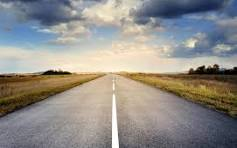

In [86]:
im = Image.open("road.jpg")
im.to_thumb(256,256)

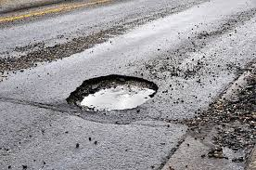

In [87]:
im = Image.open("pothole.jpg")
im.to_thumb(256,256)

**TESTING ROAD IMAGE**

In [92]:
for i in ["road.jpg", "pothole.jpg"]:
    term,_,probs = learn.predict(PILImage.create(i))
    print(f"This is a: {term[:-1]}.")
    print(f"Probability it's a {i[:-4]}: {probs[0]:.4f}")

This is a: road.
Probability it's a road: 0.0001


This is a: pothole.
Probability it's a pothole: 0.9888
